<a href="https://colab.research.google.com/github/compartia/nlp_tools/blob/tensorflow-model/notebooks/2_test_demo_no_UI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
GLOBALS__={}

In [2]:
#@title Настройки { run: "auto", vertical-output: true, display-mode: "form" }
USD_to_RUB = 20034.02 #@param {type:"number"}
RUB_to_USD = 1.0/USD_to_RUB

# print('USD_to_RUB=',USD_to_RUB)
# print('RUB_to_USD=',RUB_to_USD)



currency_converter = {
  'USD': USD_to_RUB,
  'RUB': 1.0
}

print(currency_converter)

{'USD': 20034.02, 'RUB': 1.0}


#MAIN

In [0]:
# @title Обработка документов { output-height: 800, form-width: "300px", display-mode: "form" }


import os
import sys


def interactive_upload(filetype):
  from google.colab import files
  import docx2txt

  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs = []
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text

    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs


# ====================================
# ====================================
_git_branch = "tensorflow-model"  # @param {type:"string"}
# ====================================
# ====================================


# ''' AZ:-IMPORT CODE GITHUB----------------------------------------------😺------ '''
import sys


def _init_import_code_from_gh():
  if 'GLOBALS__' not in globals():
    print('adding global GLOBALS__')
    global GLOBALS__
    GLOBALS__ = {}

  if '_init_import_code_from_gh' in GLOBALS__:
    print('👌 code already imported from GitHub!')
    return

  import subprocess
  def exec(x):
    r = subprocess.check_output(x, shell=True)
    r = r.decode('unicode-escape').encode('latin1').decode('utf8')
    print(r)

  print(f"fetching code from GitHub.....{_git_branch}")
  try:
    exec('rm -r nlp_tools')
  except:
    pass
  exec(f'git clone --single-branch --branch {_git_branch} https://github.com/compartia/nlp_tools.git nlp_tools')

  print('🦊 GIT revision:')
  exec('cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B')

  sys.path.insert(0, 'nlp_tools')

  
  print('code imported OK 👍')

  print('installing antiword...')
  exec('sudo apt-get install antiword')

  print('installing docx2txt...')
  exec("pip install docx2txt")

  GLOBALS__['_init_import_code_from_gh'] = True

  ''' AZ:-------------------------------------------------IMPORT CODE GITHUB-😺---'''
  print('❤️ DONE importing Code fro GitHub')


# AZ:-INIT ELMO-----------------------------------------------------------------------------------

import tensorflow as tf
import tensorflow_hub as hub


def _import_elmo():
  """
  ACHTUNG!! this method is called later by ElmoEmbedder
  """

  elmo = hub.Module('https://storage.googleapis.com/az-nlp/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz',
                    trainable=False)  # news
  #   elmo = hub.Module('https://storage.googleapis.com/az-nlp/elmo_ru-twitter_2013-01_2018-04_600k_steps.tar.gz',
  #                     trainable=False)  # twitter
  print('❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module ')
  print('Tensorflow version is', tf.__version__)

  return elmo


# AZ:-INIT EMBEDDER-----------------------------------------------------------------------------------

def _init_embedder():
  if 'elmo_embedder' in GLOBALS__:
    print('👌 Embedder is already created! ')
    return

  from embedding_tools import ElmoEmbedder
  GLOBALS__['elmo_embedder'] = ElmoEmbedder(_import_elmo(), tf, 'elmo', _import_elmo)

  print('❤️ DONE creating words embedding model')
  return GLOBALS__['elmo_embedder']


# AZ:-Init chartes context-----------------------------------------------------------------------------------
def _init_charters():
  if 'CharterAnlysingContext' in GLOBALS__:
    print('👌 Charters-related tools are already inited ')
    return

  _init_embedder()  # PRECONDITION
  from charter_patterns import CharterPatternFactory
  from charter_parser import CharterDocumentParser
  CPF = CharterPatternFactory(GLOBALS__['elmo_embedder'])
  GLOBALS__['CharterAnlysingContext'] = CharterDocumentParser(CPF)
  print('❤️ DONE initing Charters-related tools and models ')


def _init_contracts():
  if 'ContractAnlysingContext' in GLOBALS__:
    print('👌 Contracts-related tools are already inited ')
    return

  from contract_parser import ContractAnlysingContext
  GLOBALS__['ContractAnlysingContext'] = ContractAnlysingContext(GLOBALS__['elmo_embedder'], GLOBALS__['renderer'])
  print('❤️ DONE initing Contracts-related tools and models ')


# AZ:- THE CODE----------------------------------------------------------------------------------
from typing import List


def _init_the_code(reset=False):
  if '_init_the_code' in GLOBALS__ and not reset:
    print('👌 Code is alredy imported!')
    return

  from transaction_values import ValueConstraint

  import matplotlib as mpl
  from IPython.core.display import display, HTML
  import matplotlib.pyplot as plt
  
  from renderer import AbstractRenderer, HtmlRenderer, head_types_colors
  from renderer import to_multicolor_text, as_headline_3, as_offset
  from renderer import as_msg, as_quote, as_c_quote
  from renderer import as_error_html, known_subjects_dict, v_color_map
  from transaction_values import ValueConstraint
  from parsing import head_types_dict, head_types
  from legal_docs import PatternSearchResults, ConstraintsSearchResult, PatternSearchResult, CharterDocument
  
  import numpy as np
  
  from charter_patterns import known_subjects
  from patterns import AV_SOFT, AV_PREFIX
  from structures import ContractSubject
  from contract_parser import ContractDocument3

  def _as_smaller(txt):
    return f'<div font-size:12px">{txt}</div>'
 
  
      
  class DemoRenderer(HtmlRenderer):

    def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      print('render_color_text')
      html = self.to_color_text(tokens, weights, colormap, print_debug, _range)
      display(HTML(html))
                

    def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      if len(tokens) == 0:
        return " - empty -"
      if len(weights) != len(tokens):
        raise ValueError("number of weights differs weights={} tokens={}".format(len(weights), len(tokens)))

      #   if()
      vmin = weights.min()
      vmax = weights.max()

      if _range is not None:
        vmin = _range[0]
        vmax = _range[1]

      if print_debug:
        print(vmin, vmax)

      norm = mpl.colors.Normalize(vmin=vmin - 0.5, vmax=vmax)
      html = ""
      cmap = mpl.cm.get_cmap(colormap)

      for d in range(0, len(weights)):
        word = tokens[d]
        if word == ' ':
          word = '&nbsp;_ '

        html += '<span title="{} {:.4f}" style="background-color:{}">{} </span>'.format(
          d,
          weights[d],
          mpl.colors.to_hex(cmap(norm(weights[d]))),
          word)

        #     html+='<span style="background-color:' +mpl.colors.to_hex(cmap(norm(weights[d]) ))+ '">' + str(tokens[d]) + " </span>"
        if tokens[d] == '\n':
          html += "<br>"

      return html

    ''' AZ:-Rendering CHARITY🔥-----💸------💸-------💸------------------------------'''
    def render_multicolor_text(self, tokens, vectors, colormap, min_color=None, _slice=None):
      display(HTML(to_multicolor_text(tokens, vectors, colormap, min_color=min_color, _slice=_slice)))

    

    ''' AZ:------💸------💸-------💸----------------------END--Rendering CHARITY🔥------'''

    



    def render_subj(self, contract: ContractDocument3):
      subjects: List[ProbableValue] = contract.subjects

      if len(subjects) > 0:
        sorted_ = [y for y in sorted(subjects, key=lambda x: -x.confidence)]
        subject_kind = sorted_[0].value
        confidence = sorted_[0].confidence
      else:
        subject_kind = ContractSubject.Other

      if subject_kind in known_subjects_dict:
        rendering_name = known_subjects_dict[subject_kind]
      else:
        rendering_name = 'прочее'

      display(
        HTML(f'Предмет договора:'
             f'<h3 style="margin:0">{rendering_name}<sup> {subject_kind}</sup> </h3> '
             f'confidence:{confidence:20,.2f}'))



    def sign_to_text(self, sign: int):
      if sign < 0: return " &lt; "
      if sign > 0: return " &gt; "
      return ' = '

    def probable_value_to_html(self, pv):
      vc = pv.value
      color = '#333333'
      if vc.sign > 0:
        color = '#993300'
      elif vc.sign < 0:
        color = '#009933'

      return f'<b style="color:{color}">{self.sign_to_text(vc.sign)} {vc.currency} {vc.value:20,.2f} confidence={pv.confidence:20,.2f}</b> '

    def render_contents(self, doc):
      html = as_headline_3('Выявленное Содержание документа')
      html += "<ul>"
      for i in doc.structure.headline_indexes:
        line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li> {line} <sup>line {i}</sup></li>'
      html += "</ul>"

      display(HTML(html))

    def render_sections(self, sections):
      from legal_docs import HeadlineMeta
      html = as_headline_3('Выявленное секции документа')
      html += "<ul>"
      for section_type in sections:
        section: HeadlineMeta = sections[section_type]
        body = section.body.untokenize_cc()[:1000]
        headline = section.subdoc.untokenize_cc()[:500]
        #     line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li><h3> {headline} <sup>type: {section_type}</sup> </h3> <p>{body}</p> </li>'
      html += "</ul>"

      display(HTML(html))

    def render_values(self, values):
      if len(values) > 0:
        for pv in values:
          h = self.probable_value_to_html(pv)
          display(HTML(h))
      else:
        display(HTML('сумма не найдена'))

    def render_value_section_details(self, value_section_info):
      value_section = value_section_info.body
      headline_doc = value_section_info.subdoc

      headline = headline_doc.untokenize_cc()

      v_names = {
        'value_attention_vector',
        'novalue_attention_vector',

        'novalue_attention_vector_local_contrast',
        'value_attention_vector_tuned'}

      fig = plt.figure(figsize=(20, 6))
      ax = plt.axes()
      for vector_name in v_names:
        ax.plot(value_section.distances_per_pattern_dict[vector_name], label=vector_name, alpha=0.4)

      ax.plot(value_section.distances_per_pattern_dict['value_attention_vector_tuned'], label='value_attention result',
              alpha=0.9, color='black')
      plt.legend(loc='upper right')

      text = self.to_color_text(value_section.tokens_cc,
                                value_section.distances_per_pattern_dict['value_attention_vector_tuned'], _range=(0, 1))
      html = f'{ as_headline_3(headline)} <div style="margin-left:4em; font-size=90%">{text}</div>'
      display(HTML(html))

     
    def render_charter_parsing_results_2(self, charter):
      display(HTML(self.charter_parsing_results_to_html(charter)))
      
    def render_charter_parsing_results(self, doc, org, rz, charity_constraints):
      WARN = '\033[1;31m======== Dear Artem, ACHTUNG! 🔞 '
      print (WARN+f"use {self.render_charter_parsing_results} is deprecated")
      txt_html = self.to_color_text(org['tokens'], org['attention_vector'], _range=[0, 1])

      html = '<div style="background:#eeeeff; padding:0.5em"> recognized NE(s): <br><br> org type:<h3 style="margin:0">  {} </h3>org full name:<h2 style="margin:0">  {} </h2> <br>quote: <div style="font-size:90%; background:white">{}</div> </div>'.format(
        org['type_name'], org['name'], txt_html)
      # html+=txt_html
      html += self.render_constraint_values(doc, rz, charity_constraints)

      display(HTML(html))

 

     

    
 

  GLOBALS__['renderer'] = DemoRenderer()

  # AZ:----------PROTOCOLS RENDERER-------------------------

  from legal_docs import LegalDocument

  import matplotlib as mpl
  from IPython.core.display import display, HTML
  from renderer import as_headline_3, as_headline_4
  
  class ProtocolRenderer(DemoRenderer):

    def winning_patterns_to_html(self, _tokens, ranges, winning_patterns, _range,
                                 colormaps=['Reds', 'Purples', 'Blues', 'Greens', 'Greys']):
      vmin = -ranges[1]
      vmax = -ranges[0]

      #     print("winning_patterns_to_html _range", _range, "min max=", ranges)

      norm = mpl.colors.Normalize(vmax=vmax, vmin=vmin)

      cmaps = []

      #     print (colormaps)
      for n in colormaps:
        cmap = mpl.cm.get_cmap(n)
        cmaps.append(cmap)

      html = ""

      for d in _range:
        winning_pattern_i = winning_patterns[d][0]
        colormap = cmaps[winning_pattern_i % len(colormaps)]
        normed = norm(-winning_patterns[d][1])
        color = mpl.colors.to_hex(colormap(normed))
        html += '<span title="' + '{} {:.2f}'.format(d, winning_patterns[d][
          1]) + '" style="background-color:' + color + '">' + str(
          _tokens[d]) + " </span>"
        if _tokens[d] == '\n':
          html += "<br>"

      return html

    def _render_doc_subject_fragments(self, doc):
      #     print(doc.per_subject_distances)

      _html = ""
      if doc.per_subject_distances is not None:

        type = "Договор  благотворительного пожертвования"
        if doc.per_subject_distances[0] > doc.per_subject_distances[1]:
          type = "Договор возмездного оказания услуг"

        _html += "<h3>" + type + "</h3>"

        colormaps = ['PuRd'] * 5 + ['Blues'] * 7 + ['Greys']

        _html += as_headline_4('Предмет договора')

        for region in [doc.subj_range]:
          _html += self.winning_patterns_to_html(_tokens=doc.tokens, ranges=doc.subj_ranges,
                                                 winning_patterns=doc.winning_subj_patterns, _range=region,
                                                 colormaps=colormaps)

      return _html

    def render_subject(self, counter):
      html = as_headline_3('Предмет документа (X):') + self.subject_type_weights_to_html(counter)
      display(HTML(html))

    def print_results(self, _doc: LegalDocument, results=None):

      if results is None:
        results = _doc.found_sum

      result, (start, end), sentence, meta = results

      html = "<hr>"

      html += self._render_doc_subject_fragments(_doc)

      if result is None:
        html += '<h2 style="color:red">СУММА НЕ НАЙДЕНА</h2>'
      else:
        html += '<h2>' + str(result[0]) + ' ' + str(result[1]) + '</h2>'

      for key in meta.keys():
        html += '<div style="font-size:9px">' + str(key) + " = " + str(meta[key]) + "</div>"

      display(HTML(html))
      self.render_color_text(_doc.tokens[start:end], _doc.sums[start:end])

    def subject_type_weights_to_html(self, counter):
      dict = {
        't_dea': 'Сделка',
        't_cha': 'Благотворительность',
        't_org': 'Организационные решения'
      }

      maxkey = "None"
      for key in dict:
        if counter[key] > counter[maxkey]:
          maxkey = key

      html = ""
      for key in dict:
        templ = "<div>{}: {}</div>"
        if key == maxkey:
          templ = '<b style="font-size:135%; color:maroon">{}: {}</b>'
        html += templ.format(counter[key], dict[key])

      return html

  GLOBALS__['ProtocolRenderer'] = ProtocolRenderer()

  from demo_protocols import ProtocolAnlysingContext
  GLOBALS__['ProtocolAnlysingContext'] = ProtocolAnlysingContext(GLOBALS__['elmo_embedder'], GLOBALS__['ProtocolRenderer'])
  GLOBALS__['_init_the_code'] = True

  # AZ:-------------------------------------------------Init Protocols context===

  # AZ:-------------------------------------------------Init Charters context====

  def read_doc(fn):
    import docx2txt, sys, os
    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()

    return text

  GLOBALS__['read_doc'] = read_doc

  print("❤️ DONE initializing the code")


# AZ:-FINDING_VIOLATIONS--------------------------------------------------------
def find_and_show_violations():
  from IPython.core.display import display, HTML

  from contract_parser import ContractAnlysingContext
  from renderer import as_headline_2, as_error_html

  print('Поиск нарушений')

  charterAnlysingContext: CharterAnlysingContext = GLOBALS__['CharterAnlysingContext']
  contractAnlysingContext: ContractAnlysingContext = GLOBALS__['ContractAnlysingContext']

  contract = contractAnlysingContext.contract
  charter = charterAnlysingContext.doc
  charter_constraints = charterAnlysingContext.constraints  # XXX: move to doc

  renderer = GLOBALS__['renderer']
  renderer.render_subj(contract)

  import copy

  def convert(v):
    v_converted = copy.copy(v)
    if v.currency in currency_converter:
      v_converted.value = currency_converter[v.currency] * v.value
      v_converted.currency = 'RUB'
      return v_converted
    else:
      display(HTML(as_error_html(
        f"мы не в настроении (пока) конвертировать {v.currency} --> RUB. Это вообще валюта какой страны? Румынии?")))
      return v

  best_value = contractAnlysingContext.find_contract_best_value(convert)

  # rendering:----------------------------

  def _render_violations(ranges_by_group, best_value):
    for group_key in ranges_by_group:
      group = ranges_by_group[group_key]
      display(HTML(as_headline_2(group['name'])))

      for rk in group['ranges']:
        r = group['ranges'][rk]
        display(HTML(r.check_contract_value(best_value, convert, renderer)))

  print("Сумма Договора:")
  renderer.render_values([best_value])
  renderer.render_color_text(best_value.value.context.tokens, best_value.value.context.attention, _range=[0, 1])

  _render_violations(
    charterAnlysingContext.find_ranges_by_group(charter_constraints, convert, verbose=False),
    best_value)

#   display(HTML(renderer.render_constraint_values(charter_constraints)))


# AZ:--------------------------------------------------------FINDING_VIOLATIONS-

# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXX

# step 0. Инит всега

In [4]:
## do preparation here

# 1.
_init_import_code_from_gh()
# 2.
_init_embedder()
# 3.
_init_the_code()
4.
_init_charters()
# 5.
_init_contracts()

fetching code from GitHub.....tensorflow-model


🦊 GIT revision:
448
* tensorflow-model
Created using Colaboratory
Merge branch 'master' into tensorflow-model

# Conflicts:
#	legal_docs.py

Merge remote-tracking branch 'origin/tensorflow-model' into tensorflow-model

# Conflicts:
#	notebooks/Search_patterns_right_in_TF.ipynb


code imported OK 👍
installing antiword...
Reading package lists...
Building dependency tree...
Reading state information...
antiword is already the newest version (0.37-11build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.

installing docx2txt...

❤️ DONE importing Code fro GitHub
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


W0709 08:32:30.422722 140167165036416 deprecation_wrapper.py:119] From nlp_tools/embedding_tools.py:109: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0709 08:32:30.423968 140167165036416 deprecation_wrapper.py:119] From nlp_tools/embedding_tools.py:116: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module 
Tensorflow version is 1.14.0
❤️ DONE creating words embedding model
❤️ DONE initializing the code
👌 Embedder is already created! 
🐌 Embedding 871 words... it takes time (☕️?)..


W0709 08:32:32.266366 140167165036416 deprecation_wrapper.py:119] From nlp_tools/embedding_tools.py:132: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



Embedding complete 🐌 ; the shape is (83, 20, 1024)
❤️ DONE initing Charters-related tools and models 
🐌 Embedding 513 words... it takes time (☕️?)..
Embedding complete 🐌 ; the shape is (61, 33, 1024)
❤️ DONE initing Contracts-related tools and models 


# step 1. Устафф

In [0]:
uploaded = interactive_upload('Устафф, он лёххх, но подумафф он осознал, что он не такой уж и Лёхх')

_CTX = GLOBALS__['CharterAnlysingContext']
_CTX.verbosity_level=2
_CTX.analyze_charter(uploaded[0], True)


GLOBALS__['renderer'].render_charter_parsing_results_2(_CTX.charter)
GLOBALS__['renderer'].render_contents(_CTX.doc)


In [0]:
# GLOBALS__['renderer'].render_charter_parsing_results(_CTX.doc, _CTX.org, _CTX.constraints, _CTX.charity_constraints)
# _CTX.charter._constraints[0].__dict__
for c in GLOBALS__['CharterAnlysingContext'].charter._constraints:
  print(c.__dict__)



In [0]:
## NEW
# del(GLOBALS__['_init_the_code'] )
_init_the_code(True)
GLOBALS__['renderer'].render_charter_parsing_results_2(_CTX.charter)
# GLOBALS__['renderer'].render_contents(_CTX.doc)

In [0]:
GLOBALS__['renderer'].render_charter_parsing_results(_CTX.doc, _CTX.org, _CTX.constraints, _CTX.charity_constraints)
# GLOBALS__['renderer'].render_contents(_CTX.doc)

In [0]:
GLOBALS__['CharterAnlysingContext'].constraints['head.directors'][0].__dict__

### tests, experiments

In [0]:
if False:
  GLOBALS__['CharterAnlysingContext'].verbosity_level=2
  org, rz = GLOBALS__['CharterAnlysingContext'].analyze_charter(text, True)
  doc = GLOBALS__['CharterAnlysingContext'].doc
  charity_constraints = GLOBALS__['CharterAnlysingContext'].charity_constraints
  org = GLOBALS__['CharterAnlysingContext'].org


  GLOBALS__['renderer'].render_contents(doc)
  GLOBALS__['renderer'].render_charter_parsing_results(doc, org, rz)

In [0]:
str(_CTX.constraints['head.all'][0].subdoc.subject_mapping["subj"])

## 👞 Constraint type detection

### Factory extension (careful)

In [0]:
def build_lawsuit_patterns(factory):
  def cp(name, tuples):
    return factory.create_pattern(name, tuples)

#   cp('x_lawsuit_4', ('начало/урегулирование любых', 'судебных', 
#                 'споров, подписание мирового соглашения, признание иска, отказ от иска, а также любые другие  ',
#                       ))

#   cp('x_lawsuit_3', ('судебных споров, цена ',
#                        'иска',
#                        'по которым превышает'))
  cp('x_lawsuit_6', ( 'принятие решения об осуществлении следующих действий и решений , связанных со', 'спорами', 'Общества с Органами государственной власти , на суммы '  ))
  
  
 
  
  
build_lawsuit_patterns(GLOBALS__['CharterAnlysingContext'].pattern_factory)
GLOBALS__['CharterAnlysingContext'].pattern_factory.embedd()

In [0]:
raise sure?

# def build_realestate_patterns(factory):
#   def cp(name, tuples):
#     return factory.create_pattern(name, tuples)

#   cp('x_realestate_1', ('отчуждению активов общества ( включая', 'недвижимость', '',))

#   cp('x_realestate_2', ('судебных споров, цена ',
#                        'иска',
#                        'по которым превышает'))
 
  
  
# build_realestate_patterns(GLOBALS__['CharterAnlysingContext'].pattern_factory)
# GLOBALS__['CharterAnlysingContext'].pattern_factory.embedd()

In [0]:
# def build_incl_patterns(factory):
#   def cp(name, tuples):
#     return factory.create_pattern(name, tuples)

#   cp('x_exclusive_1', ('', 'исключая', 'сделки'))

#   cp('x_inclusive_1', ('', 'включая', 'сделки'))
  
# build_incl_patterns(GLOBALS__['CharterAnlysingContext'].pattern_factory)
# GLOBALS__['CharterAnlysingContext'].pattern_factory.embedd()

In [0]:
_init_the_code(True)

In [0]:
from IPython.core.display import display, HTML

CH_CTX=GLOBALS__['CharterAnlysingContext']

from charter_patterns import find_sentences_by_pattern_prefix

a:dict = find_sentences_by_pattern_prefix(  CH_CTX.pattern_factory, CH_CTX._get_head_sections(), 'x_charity_')
b:dict = find_sentences_by_pattern_prefix(  CH_CTX.pattern_factory, CH_CTX._get_head_sections(), 'sum__')
lawsuits = find_sentences_by_pattern_prefix(  CH_CTX.pattern_factory, CH_CTX._get_head_sections(), 'x_lawsuit_')
  
def merge_quotes_by_head_type (a, b):
  res={}
  for head in a:
    res[head] = a[head]+b[head]
  return res
  
merged=merge_quotes_by_head_type(a, b)
merged=merge_quotes_by_head_type(merged, lawsuits)
# soft$.$at_sum__
for head in merged:
  print(CH_CTX.doc.sections[head].body.distances_per_pattern_dict.keys())
  html = GLOBALS__['renderer'].html_charity_constraints_by_head(merged[head] )
  display(HTML(html))

In [0]:
from IPython.core.display import display, HTML
_init_the_code(True)
CH_CTX=GLOBALS__['CharterAnlysingContext']

from charter_patterns import find_sentences_by_pattern_prefix
realestates = find_sentences_by_pattern_prefix( CH_CTX.pattern_factory, CH_CTX._get_head_sections(), 'sum__')
  

for head in lawsuits:
  html = GLOBALS__['renderer'].html_charity_constraints_by_head(realestates[head] )
  display(HTML(html))

In [0]:
from IPython.core.display import display, HTML

CH_CTX=GLOBALS__['CharterAnlysingContext']

from charter_patterns import find_sentences_by_pattern_prefix
lawsuits = find_sentences_by_pattern_prefix( CH_CTX.pattern_factory, CH_CTX._get_head_sections(), 'x_ContractSubject.RealEstate')
  
 
  
# soft$.$at_sum__
for head in lawsuits:
  print(CH_CTX.doc.sections[head].body.distances_per_pattern_dict.keys())
  html = GLOBALS__['renderer'].html_charity_constraints_by_head(lawsuits[head] )
  display(HTML(html))

In [0]:

from legal_docs import ConstraintsSearchResult, PatternSearchResult
from IPython.core.display import display, HTML
from renderer import as_quote, to_multicolor_text
 

CH_CTX=GLOBALS__['CharterAnlysingContext']


def estimate_confidence(vector):
  sum_ = sum(vector)
  _max = np.max( np.nonzero(vector) )
  nonzeros_count = len(np.nonzero(vector)[0])
  confidence = 0

  if nonzeros_count > 0:
    confidence = sum_ / nonzeros_count
    
  return confidence, sum_, nonzeros_count,  _max

for constraints in CH_CTX.constraints['head.directors']:
  html =GLOBALS__['renderer']._render_sentence(constraints)
  display(HTML(html))
  context:PatternSearchResult = constraints.subdoc
  print(context.confidence)
  print(context.pattern_prefix)
  print(context.tokens)
#   'soft$.$at_x_realestate_'
  confidence, sum_, nonzeros_count, _max = estimate_confidence(context.get_attention())
  print(f'confidence={confidence:.4f} \t sum_{sum_} \t nonzeros_count={nonzeros_count} \t_max={_max:.4f}')
  
  GLOBALS__['renderer'].render_color_text(context.tokens, context.get_attention('soft$.$at_x_realestate_'), _range=[0,1])

In [0]:
from legal_docs import calculate_distances_per_pattern
from ml_tools import *
from patterns import *

#XXX: renamed from find_charity_sentences


  
 

###-----test
CH_CTX=GLOBALS__['CharterAnlysingContext']
renderer = GLOBALS__['renderer']
charter = CH_CTX.doc
section = charter.sections['head.directors'].body


slices1, attention_v_name_consent = find_sentences_by_pattern_prefix (section, CH_CTX.pattern_factory, pattern_prefix='d_order_consent')
slices2, attention_v_name_charity = find_sentences_by_pattern_prefix (section, CH_CTX.pattern_factory, pattern_prefix='x_charity')
slices3, attention_v_name_law = find_sentences_by_pattern_prefix (section, CH_CTX.pattern_factory, pattern_prefix='x_lawsuit_')
slices4, attention_v_currency = find_sentences_by_pattern_prefix (section, CH_CTX.pattern_factory, pattern_prefix='currency')


attention_incl,_ = make_attention_vector(section, CH_CTX.pattern_factory, 'x_inclusive')
attention_excl,_ = make_attention_vector(section, CH_CTX.pattern_factory, 'x_exclusive')

attention_excl=momentum(attention_excl, 0.9)

colormap = {
    'red':(1,0,0),
    'red1':(1,0.4,0),
    'green':(0,1,0),
    'blue':(0,0,1),
    'cyan':(0,0.7,1),
    'yellow':(0.9,0.8,0)
}

alltogether={}
def merge_slices(slices1):
  for _slice in slices1:
    alltogether[_slice [0].start] = _slice
    ss=section.subdoc_slice( _slice [0] )

merge_slices(slices1)
merge_slices(slices3)
merge_slices(slices2)
merge_slices(slices4)

ssss=[]
for k in alltogether:
  _slice=alltogether[k]
#   print(_slice)
  ss=section.subdoc_slice( _slice [0] )
  vectors = {
    'red':ss.distances_per_pattern_dict['soft$.'+attention_v_name_law],
    'cyan':ss.distances_per_pattern_dict['soft$.'+attention_v_name_charity],
#     'green':ss.distances_per_pattern_dict['soft$.'+attention_v_name_consent],
    'red1':ss.distances_per_pattern_dict['soft$.'+attention_v_currency],
      
    'yellow':attention_incl[_slice [0] ],
    'green':attention_excl[_slice [0] ],
  }
  ssss.append(ss)
#   print (ss.tokens_cc)
  renderer.render_multicolor_text(ss.tokens_cc, vectors, colormap=colormap)
#   renderer.render_color_text(ss.tokens, vectors['red'])
del ssss
# print (slices)
# print(section.distances_per_pattern_dict)
# vectors['red']
from IPython.core.display import display, HTML
display(HTML('ddd'))
GLOBALS__['renderer'].__dict__

In [0]:
# contract value: 5
  
# directors:{
    
#     [4, 6]: True
#     [6, 20]: False
#     [2, inf]: True
#     [-inf, 4]: False
    
# } ==> True | False | True | False ===> True
  
  
  
# all:{    
#     [6, inf]: False
#     [6, 20]: False
#     [2, inf]: True
#     [-inf, 4]: False
    
# } ==> True | False | True | False ===> True
  
  
# for level in OrgLevel:
#   for constraint in OrgLevel.constraints:
#     if contract.value in range(constraint.min, constraint.max) 
#       if constraint.subj == contract.subj
#         raise RedFlag('а чо протокол-то есть?')

# if contract.value > max ( every constraint.max)
#    raise RedFlag('что-то не так')

#### Charitiy finder

In [0]:
def build_charity_patterns(factory):
  def cp(name, tuples):
    return factory.create_pattern(name, tuples)

  cp('x_charity_1', ('договор',
                     'благотворительного',
                     'пожертвования'))

  cp('x_charity_1.1', ('одобрение внесения Обществом каких-либо вкладов или пожертвований на политические или',
                       'благотворительные',
                       'цели'))

  cp('x_charity_1.2', ('одобрение внесения Обществом каких-либо вкладов или',
                       'пожертвований',
                       'на политические или благотворительные цели '))

  cp('x_charity_2', ('предоставление',
                     'безвозмездной',
                     'помощи финансовой')),

  cp('x_charity_3', ('согласование сделок',
                     ' дарения ',
                     ' '))


from typing import List

import numpy as np

from legal_docs import calculate_distances_per_pattern
from ml_tools import filter_values_by_key_prefix, max_exclusive_pattern, relu
from patterns import improve_attention_vector
from text_tools import get_sentence_bounds_at_index


def find_charity_constraints(doc, factory, head_sections:dict ) -> dict:
  charity_quotes_by_head_type = {}
  for section_name in head_sections:

    # section_name = section_prefix + head
    # print(head, '->', section_name)
    if section_name in doc.sections:
      subdoc = doc.sections[section_name].body
      # subdoc.calculate_distances_per_pattern(TFAA)

      print(section_name)
      bounds = find_charity_sentences(subdoc, factory)
      charity_quotes_by_head_type[section_name] = bounds

      # print('ok')
  return charity_quotes_by_head_type


def find_charity_sentences(subdoc, factory) -> List:
  """
    returns list of tuples (slice, confidence, summa-of-attention-)
  """

  calculate_distances_per_pattern(subdoc, factory, merge=True, pattern_prefix='x_charity_')

  slices = []
  vectors = filter_values_by_key_prefix(subdoc.distances_per_pattern_dict, 'x_charity_')
  vectors_i = []
  for v in vectors:
    if max(v) > 0.6:
      vector_i, _ = improve_attention_vector(subdoc.embeddings, v, relu_th=0.6, mix=0.9)
      vectors_i.append(vector_i)
    else:
      vectors_i.append(v)

  x = max_exclusive_pattern(vectors_i)
  x = relu(x, 0.8)
  subdoc.distances_per_pattern_dict['$at_x_charity_'] = x

  dups = {}
  for i in np.nonzero(x)[0]:
    bounds = get_sentence_bounds_at_index(i, subdoc.tokens)

    if bounds[0] not in dups:
      sl = slice(bounds[0], bounds[1])
      sum_ = sum(x[sl])
      confidence = 'x'
      #       confidence = np.mean( np.nonzero(x[sl]) )
      nonzeros_count = len(np.nonzero(x[sl])[0])
      print('nonzeros_count=', nonzeros_count)
      confidence = 0

      if nonzeros_count > 0:
        confidence = sum_ / nonzeros_count
      print('confidence=', confidence)
      if confidence > 0.8:
        # GLOBALS__['renderer'].render_color_text(subdoc.tokens_cc[sl],
        #                                         subdoc.distances_per_pattern_dict['$at_x_charity_'][sl], _range=(0, 1))
        print(i, sum_)

        slices.append((sl, confidence, sum_))

      dups[bounds[0]] = True

  return slices




##---test

# find_charity_constraints(self.doc, GLOBALS__['CharterAnlysingContext'].pattern_factory, self._get_head_sections())
# GLOBALS__['CharterAnlysingContext'].

charity_constraints = find_charity_constraints(doc, 
                                               GLOBALS__['CharterAnlysingContext'].pattern_factory, 
                                               GLOBALS__['CharterAnlysingContext']._get_head_sections())


#### Render charity constraints

In [0]:


 
  



#---CharterRenderer
_CTX = GLOBALS__['CharterAnlysingContext']
_cr = CharterRenderer()
_cr.render_charter_parsing_results(_CTX.doc, _CTX.org, _CTX.constraints, _CTX.charity_constraints)
# _cr.render_contents(_CTX.doc)


In [0]:
# # GLOBALS__['renderer'].render_color_text(subdoc.tokens_cc, subdoc.distances_per_pattern_dict['x_charity_1.2'], _range=(0,1))
# # x = max_exclusive_pattern_by_prefix(subdoc.distances_per_pattern_dict, 'x_charity_')
# import numpy as np
# from text_tools import get_sentence_bounds_at_index
# from ml_tools import filter_values_by_key_prefix,max_exclusive_pattern, momentum, smooth_safe, smooth, relu
# from patterns import improve_attention_vector
# vectors = filter_values_by_key_prefix(subdoc.distances_per_pattern_dict, 'x_charity_')
# vectors_i=[]
# for v in vectors:
#   if max(v)>0.6:
#     vector_i, _ = improve_attention_vector(subdoc.embeddings, v, relu_th=0.6, mix=0.9)
#     vectors_i.append(vector_i)
#   else:
#     vectors_i.append(v)
    
# x = max_exclusive_pattern(vectors_i)
# x=relu(x, 0.8)
# i = np.argmax(x)
# sl = slice( i-150, i+150)



# dups={}
# for i in np.nonzero(x)[0]:
#   bounds = get_sentence_bounds_at_index( i, subdoc.tokens)
  
#   if bounds[0] not in dups:
#     sl=slice(bounds[0], bounds[1])
#     sum_ = sum(x[sl])

#     if sum_ >2:
#       GLOBALS__['renderer'].render_color_text(subdoc.tokens_cc[sl], x[sl], _range=(0,1))
#       print(i, sum_)
# #       yeld (bounds)

#     dups[bounds[0]]=True

### Miscl


In [0]:
if False:
  doc.embedd(GLOBALS__['ContractAnlysingContext'].hadlines_factory)


In [0]:
if False:
  # GLOBALS__['ContractAnlysingContext'].hadlines_factory.

  doc.calculate_distances_per_pattern(GLOBALS__['CharterAnlysingContext'].hadlines_factory)



In [0]:
# print(doc.distances_per_pattern_dict.keys())
from legal_docs import rectifyed_sum_by_pattern_prefix

from ml_tools import max_exclusive_pattern_by_prefix




vv = max_exclusive_pattern_by_prefix(doc.distances_per_pattern_dict, 'headline.name.1')
print(vv[0:10])



# GLOBALS__['renderer'].render_color_text(doc.tokens_cc, vv)

for s in doc.sections:
  print (s)
  
if 'head.directors' in doc.sections:
  subdoc = doc.sections['head.directors'].body
  for ky in subdoc.distances_per_pattern_dict:
    print(ky)
  GLOBALS__['renderer'].render_color_text(subdoc.tokens_cc, subdoc.distances_per_pattern_dict['deal_attention_vector'])
  


In [0]:
 

level_by_line = [ max ( i._possible_levels) for i in doc.structure.structure ]
 


headlines_attention_vector=[]
for i in doc.structure.structure:
  l = i.span[1]-i.span[0]
  headlines_attention_vector+=[level_by_line[ i.line_number ]]*l
  
# print (pv[0:100])
headlines_attention_vector = normalize(headlines_attention_vector)
headlines_attention_vector = relu(headlines_attention_vector, 0.4)

# headlines_attention_vector = smooth(headlines_attention_vector, 20)

av= relu(headlines_attention_vector/2 + vv, 0.6)
av = momentum(av, 0.99)

GLOBALS__['renderer'].render_color_text(doc.tokens_cc, av)




## Meta-pattern! (Cool!!(!))
типа самообучение

In [0]:
# ---------
from patterns import FuzzyPattern
best_id=np.argmax(av)
best_embedding_v = doc.embeddings[best_id]

meta_pattern=FuzzyPattern('s-meta-na')
meta_pattern.embeddings =  np.array([ best_embedding_v ])

meta_pattern_attention = 1.0 - meta_pattern._eval_distances(doc.embeddings)
meta_pattern_attention = relu(meta_pattern_attention,  0.7)


GLOBALS__['renderer'].render_color_text(doc.tokens_cc, meta_pattern_attention, _range=(0,1))

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 6))
ax = plt.axes()
span=1400
ax.plot(meta_pattern_attention[best_id-span:best_id+span], alpha=0.5, color='green', label='meta_pattern_attention');
ax.plot(normalize(av[best_id-span:best_id+span]), alpha=0.5, color='red', label='av');
 

# step 2. Договор

❤️ DONE initializing the code
Please select "Договор в законе" .docx file:


Saving Договор Формула.docx to Договор Формула.docx
User uploaded file "Договор Формула.docx" with length 44863 bytes
Символов в оригинальном документе: 42964
❤️ ACCOMPLISHED: 	 0.	 parsing document 👞 and detecting document high-level structure
Embedding region: 0 6783
🐌 Embedding 6783 words... it takes time (☕️?)..
Embedding complete 🐌 ; the shape is (1, 6783, 1024)
Function _emb called 1 times. 
Execution time max: 17.9348, average: 17.9348
Embedding region: 6000 783
🐌 Embedding 783 words... it takes time (☕️?)..
Embedding complete 🐌 ; the shape is (1, 783, 1024)
Function _emb called 2 times. 
Execution time max: 17.9348, average: 11.2447
Function _emb called 2 times. 
Execution time max: 17.9348, average: 11.2447
Function _embedd_large called 1 times. 
Execution time max: 22.5006, average: 22.5006
❤️ ACCOMPLISHED: 	 1.	 Splitting Document into sections ✂️ 📃 -> 📄📄📄
----WARNING!: function rectifyed_sum_by_pattern_prefix is deprecated
REG: 50 950000 ( пятьдесят миллионов девятьсот пять

❤️ ACCOMPLISHED: 	 2.	 searching for transaction values in section  "5. СТОИМОСТЬ РАБОТ И ПОРЯДОК ОПЛАТЫ."
❤️ ACCOMPLISHED: 	 3.	 fetching transaction values


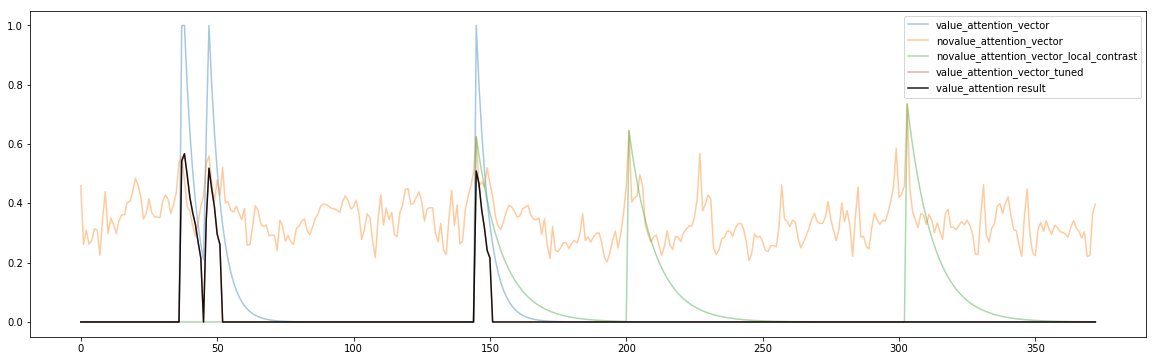

In [5]:
_init_the_code(True)

uploaded = interactive_upload('Договор в законе')

GLOBALS__['ContractAnlysingContext'].analyze_contract(uploaded[0])
doc = GLOBALS__['ContractAnlysingContext'].contract

GLOBALS__['renderer'].render_subj(doc)
GLOBALS__['renderer'].render_contents(doc)




In [6]:
_init_the_code(True)
GLOBALS__['renderer'].render_subj(doc)
GLOBALS__['renderer'].render_contents(doc)

❤️ DONE initializing the code


### Ext

In [0]:
[(y.confidence, y.value) for y in sorted(GLOBALS__['ContractAnlysingContext'].contract.subjects, key=lambda x:-x.confidence )]

In [0]:
GLOBALS__['ContractAnlysingContext'].contract.subjects[0].__dict__

In [0]:
GLOBALS__['ContractAnlysingContext'].contract.subjects[1].__dict__

In [0]:
GLOBALS__['ContractAnlysingContext'].contract.subjects[2].__dict__

In [0]:
GLOBALS__['CharterAnlysingContext'].charter.subjects[2].__dict__

# step 3. Поиск вреда

In [0]:
find_and_show_violations()

### subj correlations

In [0]:
print(GLOBALS__['ContractAnlysingContext'].contract.sections['subj'].body.untokenize_cc())
print("-"*20)
print(GLOBALS__['CharterAnlysingContext'].constraints['head.directors']['sentences'][1]['subdoc'].untokenize_cc())


docA=GLOBALS__['ContractAnlysingContext'].contract.sections['subj'].body
docB=GLOBALS__['CharterAnlysingContext'].constraints['head.directors']['sentences'][1]['subdoc']


GLOBALS__['CharterAnlysingContext'].constraints['head.directors']['sentences'][1]

In [0]:
# GLOBALS__['CharterAnlysingContext'].doc.constraints
_init_the_code(reset=True)
 

In [0]:
from patterns import dist_mean_cosine as DF
from text_tools import untokenize

#
# docA.embedd( GLOBALS__['CharterAnlysingContext'].pattern_factory )
# docB.embeddings[0:10]
# docA.embeddings = None
import numpy as np


def match_contract_to_charter_constraints(contract, charter, charter_constraints, charity_constraints):
  """
  find best constraint to apply to Contract
  """

  r_quotes = []
  r_vector = []

  quote_slice = slice(0, 17)

  if 'subj' not in contract.sections:
    raise ValueError("contract has no subject section")

  subj = contract.sections['subj'].body
  print(subj.untokenize_cc())
  print('------')
  if subj.embeddings is None:
    print("Subj embeddings are gone, restoring...")
    subj.embeddings = contract.embeddings[subj.start:subj.end]
    #     subj.tokens = doc.tokens[subj.start:subj.end]
    #     subj.tokens_cc = doc.tokens_cc[subj.start:subj.end]
    #     subj.embedd( GLOBALS__['CharterAnlysingContext'].pattern_factory )
    print('\t\t sample:', subj.embeddings[0][1:10])

  for head_type in charter_constraints:

    ##charity:
    if head_type in charity_constraints:
      print(f'{head_type} has charity constrinats')
      
      charity_constraints_by_head = charity_constraints[head_type]
      charity_constraints_by_head_new = []
      
      charity_constraints['new.'+head_type] = charity_constraints_by_head_new
      
      for i in range(len(charity_constraints_by_head)):
        _tuple = charity_constraints_by_head[i] 
#       for cc in charity_constraints[head_type]:
        _slice = _tuple[0]
        emb_charter = charter.sections[head_type].body.embeddings[_slice]
        
        distance = 1 - DF(emb_charter,  subj.embeddings[5:])
        
#         cc.add['subj_correlation'] = distance
        
#         detupling
        charity_constraints_by_head_new.append ( {
            'slice':_slice,
            'subj_correlation': distance,
            'confidence': _tuple[1],
            'sum': _tuple[2]
        })
  
        print('\t'*4, 'cc=', charity_constraints_by_head_new[i])
        
        #         print('\t\t---CC', cc[0])
        

    #       GLOBALS__['CharterAnlysingContext'].doc.sections['head.directors'].body.embeddings[_slice]

    ##------------------------charity end
    print(f'measuring {head_type} constraints...'.upper())
    cc = charter_constraints[head_type]
    quotes = cc['sentences']
    for quote in quotes:
      print()
      _q = untokenize(quote['subdoc'].tokens_cc[quote_slice])
      print(_q)

      distance = 1 - DF(quote['subdoc'].embeddings[quote_slice],
                        subj.embeddings[5:])

      quote['subj_correlation'] = distance

      print(f'distance = {distance:.4f}')

      r_quotes.append(_q)
      r_vector.append(distance)
      r_quotes.append('\n')
      r_vector.append(distance)

  GLOBALS__['renderer'].render_color_text(r_quotes, r_vector)
  print(r_vector)
  print(r_quotes)
  
  
match_contract_to_charter_constraints(GLOBALS__['ContractAnlysingContext'].contract,
                                      GLOBALS__['CharterAnlysingContext'].doc,
                                      GLOBALS__['CharterAnlysingContext'].constraints,
                                      GLOBALS__['CharterAnlysingContext'].charity_constraints
                                     )

In [0]:
from ml_tools import ProbableValue, np, TokensWithAttention
from renderer import as_warning, as_offset, as_error_html, as_msg, as_quote, as_currency
from text_tools import untokenize
from transaction_values import ValueConstraint

# //copy
class ViolationsFinder:

  def find_ranges_by_group(self, charter_constraints, m_convert, verbose=False):
    ranges_by_group = {}
    for head_group in charter_constraints:
      #     print('-' * 20)
      group_c = charter_constraints[head_group]
      data = self._combine_constraints_in_group(group_c, m_convert, verbose)
      ranges_by_group[head_group] = data
    return ranges_by_group

  @staticmethod
  def _combine_constraints_in_group(group_c, m_convert, verbose=False):
    # print(group_c)
    # print(group_c['section'])

    data = {
      'name': group_c['section'],
      'ranges': {}
    }

    sentences = group_c['sentences']
    #   print (charter_constraints[head_group]['sentences'])
    sentence_id = 0
    for sentence in sentences:
      constraint_low = None
      constraint_up = None

      sentence_id += 1
      #     print (sentence['constraints'])

      s_constraints = sentence['constraints']
      # большие ищем
      maximals = [x for x in s_constraints if x.value.sign > 0]

      if len(maximals) > 0:
        constraint_low = min(maximals, key=lambda item: m_convert(item.value).value)
        # if verbose:
        #   print("all maximals:")
        #   self.renderer.render_values(maximals)
        #   print('\t\t\t constraint_low', constraint_low.value.value)
        #   self.renderer.render_values([constraint_low])

      minimals = [x for x in s_constraints if x.value.sign <= 0]
      if len(minimals) > 0:
        constraint_up = min(minimals, key=lambda item: m_convert(item.value).value)
        # if verbose:
        #   print("all: minimals")
        #   self.renderer.render_values(minimals)
        #   print('\t\t\t constraint_upper', constraint_up.value.value)
        #   self.renderer.render_values([constraint_up])
        #   print("----X")

      if constraint_low is not None or constraint_up is not None:
        data['ranges'][sentence_id] = VConstraint(constraint_low, constraint_up, group_c)

    return data
    # ==================================================================VIOLATIONS


class VConstraint:
  def __init__(self, lower, upper, head_group):
    _emp = TokensWithAttention([''], [0])
    self.lower = ProbableValue(ValueConstraint(0, 'RUB', +1, context=_emp), 0)
    self.upper = ProbableValue(ValueConstraint(np.inf, 'RUB', -1, context=_emp), 0)

    if lower is not None:
      self.lower = lower

    if upper is not None:
      self.upper = upper

    self.head_group = head_group

  @staticmethod
  def maybe_convert(v: ValueConstraint, convet_m):
    html = ""
    v_converted = v
    if v.currency != 'RUB':
      v_converted = convet_m(v)
      html += as_warning(f"конвертация валют {as_currency(v)} --> RUB ")
      html += as_offset(as_warning(f"примерно: {as_currency(v)} ~~  {as_currency(v_converted)}  "))
    return v, v_converted, html

  def check_contract_value(self, _v: ProbableValue, convet_m, renderer):
    greather_lower = False
    greather_upper = False

    if _v is None:
      return as_error_html("сумма контракта неизвестна")
    v: ValueConstraint = _v.value

    if v is None:
      return as_error_html("сумма контракта не верна")

    if v.value is None:
      return as_error_html(f"сумма контракта не верна {v.currency}")
    ###----

    lower_v = None
    upper_v = None
    if self.lower is not None:
      lower_v: ValueConstraint = self.lower.value
    if self.upper is not None:
      upper_v: ValueConstraint = self.upper.value

    html = as_msg(f"Диапазон: {as_currency(lower_v)} < ..... < {as_currency(upper_v)}")

    v, v_converted, h = self.maybe_convert(v, convet_m)
    html += h

    if self.lower is not None:
      lower_v: ValueConstraint = self.lower.value
      lower_v, lower_converted, h = self.maybe_convert(lower_v, convet_m)
      html += h

      if v_converted.value >= lower_converted.value:
        greather_lower = True
        html += as_warning("требуется одобрение...".upper())
        html += as_warning(
          f"сумма договора  {as_currency(v_converted)}  БОЛЬШЕ нижней пороговой {as_currency(lower_converted)} ")
        html += as_quote(untokenize(lower_v.context.tokens))

    if self.upper is not None:

      upper_v: ValueConstraint = self.upper.value
      upper_v, upper_converted, h = self.maybe_convert(upper_v, convet_m)
      html += h

      if v_converted.value >= upper_converted.value:

        html += as_error_html(
          f"сумма договора  {as_currency(v_converted)} БОЛЬШЕ верхней пороговой {as_currency(upper_converted)} ")

      elif greather_lower:
        head_name = self.head_group['section']
        html += as_error_html(f'требуется одобрение со стороны "{head_name.upper()}"')

        if lower_v.context is not None:
          html += as_quote(renderer.to_color_text(lower_v.context.tokens, lower_v.context.attention, _range=[0, 1]))

        if upper_v.context is not None:
          html += '<br>'
          html += as_quote(renderer.to_color_text(upper_v.context.tokens, upper_v.context.attention, _range=[0, 1]))

    return html 
  
  
  
  # AZ:-FINDING_VIOLATIONS--------------------------------------------------------
def find_and_show_violations():
  from IPython.core.display import display, HTML

  from contract_parser import ContractAnlysingContext
  from renderer import as_headline_2, as_error_html

  charterAnlysingContext: CharterAnlysingContext = GLOBALS__['CharterAnlysingContext']
  contractAnlysingContext: ContractAnlysingContext = GLOBALS__['ContractAnlysingContext']

  contract = contractAnlysingContext.contract
  charter = charterAnlysingContext.doc
  
  charter_constraints = charterAnlysingContext.constraints  # XXX: move to doc
  charity_constraints = charterAnlysingContext.charity_constraints  # XXX: move to doc

  

  import copy

  def convert(v):
    v_converted = copy.copy(v)
    if v.currency in currency_converter:
      v_converted.value = currency_converter[v.currency] * v.value
      v_converted.currency = 'RUB'
      return v_converted
    else:
      display(HTML(as_error_html(
        f"мы не в настроении (пока) конвертировать {v.currency} --> RUB. Это вообще валюта какой страны? Румынии?")))
      return v

  best_value = contractAnlysingContext.find_contract_best_value(convert)

  # rendering:----------------------------

  def _render_violations(ranges_by_group, best_value):
    
    for group_key in ranges_by_group:
      group = ranges_by_group[group_key]
      display(HTML(as_headline_2(group['name'])))

      for rk in group['ranges']:
        r = group['ranges'][rk]
        display(HTML(r.check_contract_value(best_value, convert, renderer)))

        
  renderer = GLOBALS__['renderer']
  renderer.render_subj(contract)
  
  print('---')
  print("Сумма Договора:")
  renderer.render_values([best_value])
  renderer.render_color_text(best_value.value.context.tokens, best_value.value.context.attention, _range=[0, 1])

  violations_finder = ViolationsFinder()####//XXXX: remplaced
  
  
  _render_violations(    
    violations_finder.find_ranges_by_group(charter_constraints, convert, verbose=False),
    best_value)
  
  
  
  
  
  
find_and_show_violations()

In [0]:
contract= GLOBALS__['ContractAnlysingContext'].contract
charter = GLOBALS__['CharterAnlysingContext'].doc
# if( GLOBALS__['ContractAnlysingContext'].contract.subject[0] == 'charity'):
#   print('charity')

charity_constraints =  GLOBALS__['CharterAnlysingContext'].charity_constraints
for cc in charity_constraints:
  if cc[:4]=='new.':
    print(cc[4:].upper() )
    constraints = charity_constraints[cc]
    for constraint in constraints:
#       print(constraint)
      if constraint['subj_correlation'] > 0.5:
        GLOBALS__['ContractAnlysingContext'].renderer.render_subj(contract)
        print(contract.sections['subj'].body.untokenize_cc())
#         GLOBALS__['ContractAnlysingContext'].renderer.render_color_text(contract.sections['subj'].tokens, contract.sections['subj'].)

        print (f"\nКореляция с ограничением устава: {constraint['subj_correlation']:.4f}\n\n"  )
        print(constraint['slice'])

# contract.sections

In [0]:
DIST_FUNC(docA.embeddings,  docB.embeddings)

# step 4. Протокол



In [0]:
uploaded = interactive_upload('Протокол, протокую и буду протоковать')
GLOBALS__['ProtocolAnlysingContext'].process(uploaded[0])

In [0]:
## do preparation here   

#1.
_init_import_code_from_gh()
#2.
_init_embedder()
#3.
_init_the_code()
#4. 
_init_charters()
#5. 
# _init_contracts()

# Sample Charter

In [0]:
SAMPLE="""
 

Общие положения





 


Уставный капитал


xxvii Уставный капитал Общества составляется из номинальной стоимости долей его Участников и составляет  6 734 244 615 (Шесть миллиардов семьсот тридцать четыре миллиона двести сорок четыре тысячи шестьсот пятнадцать) рублей.



xxxv Общее собрание участников не вправе принимать решение о распределении прибыли Общества между Участниками Общества:

       • до полной оплаты всего уставного капитала Общества;

     

Органы управления


lxxxiv Органами управления Общества являются:


       • Общее собрание участников Общества;


       • Совет директоров – Коллегиальный орган управления;


       • Правление Общества - Коллегиальный исполнительный орган;


       • Генеральный директор - Единоличный исполнительный орган.


Общее собрание участников Общества


lxxxvi Высшим органом управления Общества является Общее собрание участников Общества. Очередное Общее собрание участников Общества  рассматривает и утверждает результаты деятельности Общества за финансовый год и проводится в период с 1 марта по 30 апреля. Проводимые помимо очередного Общие собрания участников Общества являются внеочередными. Внеочередные Общие собрания участников Общества проводятся в случаях, когда этого требуют интересы Общества.


lxxxvii К исключительной компетенции Общего собрания участников Общества относятся следующие вопросы:

    

       12) установление размера, состава, формы и порядка внесения дополнительных вкладов, определение общей стоимости таких дополнительных вкладов, а также иных условий внесения дополнительных вкладов Участниками Общества;
       13) принятие решения о согласии на совершение или о последующем одобрении крупных сделок, связанных с приобретением, отчуждением или возможностью отчуждения Обществом прямо или косвенно имущества, цена или балансовая стоимость которого составляет 25 (Двадцать пять) и более процентов балансовой стоимости имущества Общества по данным бухгалтерской отчетности на последнюю отчетную дату;
       14) принятие решения о согласии на совершение или о последующем одобрении сделок, в совершении которых имеется заинтересованность, если цена или стоимость имущества, являющегося предметом сделки,  превышает 10 (десять) процентов балансовой процентов  балансовой стоимости имущества Общества по данным бухгалтерской отчетности на последнюю отчетную дату.
       15) принятие решения о реорганизации или ликвидации Общества;
       26) принятие решения о согласии на совершение или о последующем одобрении сделок мены, дарения, иных сделок, предусматривающих безвозмездное отчуждение имущества Общества либо оплату (встречное предоставление) в неденежной форме,  одобрение договоров спонсорского и благотворительного характера, независимо от суммы сделки, за исключением случаев, когда такие сделки требуют получения согласия органов управления Общества как крупные сделки и сделки с заинтересованностью;
       27) решение вопросов, отнесенных к компетенции Совета директоров, в случае, если Совет директоров не избран;
       28) решение иных вопросов, отнесенных в соответствии с действующим законодательством к компетенции Общего собрания участников Общества.



Совет директоров Общества


      1. Совет директоров осуществляет общее руководство деятельностью Общества, а также контроль над исполнением решений Общего собрания участников Общества и иной деятельностью его исполнительного органа.

      2. Совет директоров состоит из 4 (Четырех) человек.

      3. К компетенции Совета директоров относится:


      14) утверждение процедур внутреннего контроля за финансово-хозяйственной деятельностью Общества, в том числе утверждение положения о внутрихозяйственном контроле, документальных проверках и ревизиях;

      15) принятие решения о согласии на совершение или о последующем одобрении сделок, связанных с осуществлением денежных выплат и (или) приобретением, отчуждением и возможностью отчуждения, обременением и возможностью обременения Обществом имущества, в рамках которых цена предложения или стоимость отчуждаемого имущества, определенная на момент совершения сделки, превышает в рамках одной сделки или нескольких взаимосвязанных сделок, заключенных в течение 6 (шести) месяцев, в совокупности 50 000 000 (Пятьдесят миллионов) рублей или эквивалент данной суммы в иной валюте, за исключением случаев, когда такие сделки требуют получения согласия органов управления Общества  как крупные сделки и сделки с заинтересованностью, а также для сделок, одобряемых в соответствии с подпунктами 22)-26) пункта 11.2 настоящего Устава, подпунктами 17) –22), 30) пункта 12.3 настоящего Устава;

      16) принятие решения о начале/урегулировании любых судебных споров и разбирательств, цена иска по которым превышает 50 000 000 (Пятьдесят миллионов) рублей (или эквивалент в другой валюте) в том числе, подписание мирового соглашения, признание иска, отказ от иска, а также совершение любых других процессуальных действий, кроме судебных споров, принятие решения, в отношении которых отнесено к компетенции Общего собрания участников Общества;


Правление Общества


 1. Правление является Коллегиальным исполнительным органом Общества. Правление Общества избирается Общим собранием участников Общества в количестве  2 (Двух) человек – членов Правления Общества.


12. В случае непринятия Правлением решения по одному и тому же вопросу в ходе 2 (Двух) надлежаще созванных заседаний Правления по любым причинам, включая отсутствие кворума и недостаточность количества голосов для принятия решения, вопрос, по которому не было принято решение, выносится на рассмотрение Совета директоров (включается в повестку дня следующего созываемого Совета директоров). Во избежание сомнений, решение не может рассматриваться как непринятое для целей настоящего пункта, в случае, если решение не принято вследствие того, что против него проголосовали или воздержались от голосования все члены Правления.

13. К компетенции Правления Общества относятся:



         • согласование кандидатур на должности руководителей структурных подразделений (за исключением филиалов и представительств) Общества, а также условий трудовых договоров с указанными лицами, согласование освобождения от должностей указанных лиц;


         • принятие решения о согласии на совершение или о последующем одобрении сделок, связанных с осуществлением денежных выплат и (или) приобретением, отчуждением и возможностью отчуждения, обременением и возможностью обременения Обществом имущества, стоимость которого в рамках одной сделки или нескольких взаимосвязанных сделок в совокупности составляет от 1 000 000 (Одного) миллиона рублей до 50 000 000 (Пятьдесят миллионов) рублей или эквивалент данной суммы в иной валюте, за исключением случаев, когда  такие сделки требуют получения согласия органов управления Общества  в соответствии с Законом и Уставом;


         • принятие решения по приемке и оплате Обществом выполненных работ по Агентскому договору на строительство объекта «Южно-Приобский газоперерабатывающий завод (ЮП ГПЗ). Газокомпрессорная станция ЮЛТ Приобского месторождения» №10-875 от 29.09.2010 г., заключенному между Обществом и ООО «Газпромнефть-Хантос».


Генеральный директор Общества


cvi Руководство текущей деятельностью Общества осуществляется единоличным исполнительным органом Общества - Генеральным директором. Генеральный директор избирается Общим собранием участников Общества сроком на 3 (Три) года, если решением Общего собрания участников не предусмотрен иной срок. Генеральный директор может быть переизбран решением Общего собрания участников Общества неограниченное количество раз. Генеральный директор действует на основании Устава Общества и трудового договора, заключаемого с ним Обществом.


       • утверждать внутренние документы, регулирующие текущую (операционную) деятельность Общества, и локальные нормативные акты (за исключением локальных нормативных актов, устанавливающих системы оплаты труда и других документов, утверждение которых отнесено к компетенции иных органов управления Общества);

       • вносить вопросы на рассмотрение Общих собраний участников Общества, заседания Совета директоров;

       • принимать решения по другим вопросам, относящимся к его компетенции.



cxlv Недействительность любого положения настоящего Устава не влечет недействительности остальных его положений. В случае вступления в силу новых нормативных актов, в соответствии с которыми отдельные положения настоящего Устава становятся недействительными, и которые требуют внести изменения в Устав, Участники обязаны принять решения о внесении соответствующих изменений в настоящий Устав.

v Полное фирменное наименование Общества на русском языке:

      Общество с ограниченной ответственностью «Южно-Приобский газоперерабатывающий завод».

      Сокращенное наименование на русском языке:

      ООО «Южно-Приобский ГПЗ».


      Полное фирменное наименование Общества на английском языке: Yuzhno-Priobsky Gaz Processing Plant Limited Liability Company.


      Сокращенное наименование на английском языке:  Yuzhno-Priobsky GPP LLC.


"""

GLOBALS__['CharterAnlysingContext'].analyze_charter(SAMPLE)

In [0]:
'пииииууу'[::-1]

In [0]:

from IPython.core.display import display, HTML
doc = GLOBALS__['CharterAnlysingContext'].doc
GLOBALS__['renderer'].render_contents(doc)

 
GLOBALS__['renderer'].render_charter_parsing_results(GLOBALS__['CharterAnlysingContext'].org,GLOBALS__['CharterAnlysingContext'].constraints)


def render_sections(sections):
  html = '<h3>Выявленное секции документа</h4>'
  html += "<ul>"
  for section_type in sections:
    section:HeadlineMeta = sections[section_type]
    body = section.body.untokenize_cc()[:1000]
    headline = section.subdoc.untokenize_cc()[:500]
    #     line = doc.structure.structure[i].to_string(doc.tokens_cc)
    html += f'<li><h3> {headline} <sup>type: {section_type}</sup> </h3> <p>{body}</p> </li>'
  html += "</ul>"

  display(HTML(html))
  
def render_contents(doc):
  html = '<h3>Выявленное Содержание документа</h4>'
  html += "<ul>"
  for i in doc.structure.headline_indexes:
    line = doc.structure.structure[i].to_string(doc.tokens_cc)
    html += f'<li> {line} <sup>line {i}</sup></li>'
  html += "</ul>"

  display(HTML(html))
  
render_sections(doc.sections)

#Upload charter

In [0]:
if False:
  uploaded = interactive_upload('Charter')  
  org, rz = GLOBALS__['CharterAnlysingContext'] .analyze_charter(uploaded[0])




In [0]:
_init_contracts()

In [0]:
GLOBALS__

#Upload contract

In [0]:
uploaded = interactive_upload('Договор')  


In [0]:
GLOBALS__['ContractAnlysingContext'].verbosity_level=4
GLOBALS__['ContractAnlysingContext'].analyze_contract(uploaded[0])

# Violations

In [0]:
#@title Настройки { run: "auto", display-mode: "form" }
USD_to_RUB = 64.02 #@param {type:"number"}
RUB_to_USD = 1.0/USD_to_RUB

# print('USD_to_RUB=',USD_to_RUB)
# print('RUB_to_USD=',RUB_to_USD)



currency_converter = {
  'USD': USD_to_RUB,
  'RUB': 1.0
}

print(currency_converter)

find_and_show_violations()

In [0]:
doc=GLOBALS__['ContractAnlysingContext'].contract
GLOBALS__['renderer'].render_contents(doc)


In [0]:


h = GLOBALS__['renderer'].render_constraint_values(GLOBALS__['CharterAnlysingContext'].constraints)
display(HTML(h))




#violations (move and erase)

In [0]:
from transaction_values import ValueConstraint

print('Поиск нарушений')
from IPython.core.display import display, HTML

contract = GLOBALS__['ContractAnlysingContext'].contract
charter = GLOBALS__['CharterAnlysingContext'].doc
charter_constraints = GLOBALS__['CharterAnlysingContext'].constraints  # XXX: move to doc

#       h = GLOBALS__['renderer'].render_constraint_values(GLOBALS__['CharterAnlysingContext'].constraints)
#       display(HTML(h))


# def max_constraint_val(constraints):
renderer = GLOBALS__['renderer']
renderer.render_subj(contract)
print()
# GLOBALS__['renderer'].render_values(contract.contract_values)

print("----------")

# GLOBALS__['renderer'].render_values([most_confident_value])
# GLOBALS__['renderer'].render_color_text (most_confident_value.value.context[0], most_confident_value.value.context[1], _range=[0,1])

# for c in contract.contract_values:
#   print(c.confidence)
#   print(c.value.value)
# #   if c.value.value > best_c.value.value:


# #   print(c.value.context)
#   GLOBALS__['renderer'].render_color_text (c.value.context[0], c.value.context[1], _range=[0,1])

# GLOBALS__['renderer'].render_contents(contract)


# -------------------charter

charter_constraints = GLOBALS__['CharterAnlysingContext'].constraints  # XXX: move to doc


from ml_tools import ProbableValue

currency_converter = {
  'USD': USD_to_RUB,
  'RUB': 1.0

}
import copy


def convert(v, currency_converter=currency_converter):
  v_converted = copy.copy(v)
  if v.currency in currency_converter:
    v_converted.value = currency_converter[v.currency] * v.value
    v_converted.currency = 'RUB'
    return v_converted
  else:
    display(HTML(as_error_html(
      f"мы не в настроении (пока) конвертировать {v.currency} --> RUB. Это вообще валюта какой страны? Румынии?")))
    return v


from text_tools import untokenize
import numpy as np

class VConstraint:
  def __init__(self, lower, upper, head_group):
    self.lower = ProbableValue( ValueConstraint(0, 'RUB', +1), 0 )
    self.upper = ProbableValue( ValueConstraint(np.inf, 'RUB', -1), 0 )
    
    if lower is not None:
      self.lower = lower
     

    if upper is not None:
      self.upper = upper
     
      
    self.head_group = head_group

  def maybe_convert(self, v: ValueConstraint, currency_converter):
    html = ""
    v_converted = v
    if v.currency != 'RUB':
      v_converted = convert(v, currency_converter)
      html += as_warning(f"конвертация валют {as_currency(v)} --> RUB ")
      html += as_offset(as_warning(f"примерно: {as_currency(v)} ~~  {as_currency(v_converted)}  "))
    return v, v_converted, html

  def check_contract_value(self, _v: ProbableValue, currency_converter):
    greather_lower = False
    greather_upper = False

    if _v is None:
      return as_error_html("сумма контракта не известна")
    v: ValueConstraint = _v.value

    if v is None:
      return as_error_html("сумма контракта не верна")

    if v.value is None:
      return as_error_html(f"сумма контракта не верна {v.currency}")
    ###----

    lower_v = None
    upper_v = None
    if self.lower is not None:
      lower_v: ValueConstraint = self.lower.value
    if self.upper is not None:
      upper_v: ValueConstraint = self.upper.value

    html = as_msg(f"диапазон: {as_currency(lower_v)} < ..... < {as_currency(upper_v)}")

    v, v_converted, h = self.maybe_convert(v, currency_converter)
    html += h

    if self.lower is not None:
      lower_v: ValueConstraint = self.lower.value
      lower_v, lower_converted, h = self.maybe_convert(lower_v, currency_converter)
      html += h

      if v_converted.value >= lower_converted.value:
        greather_lower = True
        html += as_warning("требуется одобрение...".upper())
        html += as_warning(
          f"сумма договора  {as_currency(v_converted)}  БОЛЬШЕ нижней пороговой {as_currency(lower_converted)} ")
        html += as_quote(untokenize(lower_v.context[0]))

    if self.upper is not None:

      upper_v: ValueConstraint = self.upper.value
      upper_v, upper_converted, h = self.maybe_convert(upper_v, currency_converter)
      html += h

      if v_converted.value >= upper_converted.value:

        html += as_error_html(
          f"сумма договора  {as_currency(v_converted)} БОЛЬШЕ верхней пороговой {as_currency(upper_converted)} ")

      elif greather_lower:
        head_name = self.head_group['section']
        html += as_error_html(f'требуется одобрение со стороны "{head_name.upper()}"')

        if lower_v.context is not None:
          html += as_quote(renderer.to_color_text(lower_v.context[0], lower_v.context[1], _range=[0, 1]))
        if upper_v.context is not None:
          html += '<br>'
          html += as_quote(renderer.to_color_text(upper_v.context[0], upper_v.context[1], _range=[0, 1]))

    return html


# -----------


def _combine_constraints_in_group(group_c, verbose=False):
  # print(group_c)
  # print(group_c['section'])

  data = {
    'name': group_c['section'],
    'ranges': {}
  }

  sentences = group_c['sentences']
  #   print (charter_constraints[head_group]['sentences'])
  sentence_id = 0
  for sentence in sentences:
    constraint_low = None
    constraint_up = None

    sentence_id += 1
    #     print (sentence['constraints'])

    s_constraints = sentence['constraints']
    # большие ищем
    maximals = [x for x in s_constraints if x.value.sign > 0]

    if len(maximals) > 0:
      constraint_low = min(maximals, key=lambda item: convert(item.value, currency_converter).value)
      if verbose:
        print("all maximals:")
        renderer.render_values(maximals)
        print('\t\t\t constraint_low', constraint_low.value.value)
        renderer.render_values([constraint_low])

    minimals = [x for x in s_constraints if x.value.sign <= 0]
    if len(minimals) > 0:
      constraint_up = min(minimals, key=lambda item: convert(item.value, currency_converter).value)
      if verbose:
        print("all: minimals")
        renderer.render_values(minimals)
        print('\t\t\t constraint_upper', constraint_up.value.value)
        renderer.render_values([constraint_up])
        print("----X")

    if constraint_low is not None or constraint_up is not None:
      data['ranges'][sentence_id] = VConstraint(constraint_low, constraint_up, group_c)

  return data


def find_ranges_by_group(charter_constraints):
  ranges_by_group = {}
  for head_group in charter_constraints:
    #     print('-' * 20)
    group_c = charter_constraints[head_group]
    data = _combine_constraints_in_group(group_c)
    ranges_by_group[head_group] = data
  return ranges_by_group


def select_most_confident_if_almost_equal(a: ProbableValue, alternative: ProbableValue, equality_range=0):
  if abs(convert(a.value).value - convert(alternative.value).value) < equality_range:
    if a.confidence > alternative.confidence:
      return a
    else:
      return alternative
  return a


def find_contract_best_value(contract):
  best_value: ProbableValue = max(contract.contract_values,
                                  key=lambda item: convert(item.value, currency_converter).value)

  most_confident_value = max(contract.contract_values, key=lambda item: item.confidence)
  best_value = select_most_confident_if_almost_equal(best_value, most_confident_value, 20)

  return best_value


best_value = find_contract_best_value(contract)


# rendering:----------------------------


def _render_violations(ranges_by_group, best_value):
  for group_key in ranges_by_group:
    group = ranges_by_group[group_key]
    #   print(group['name'])
    display(HTML(as_headline_2(group['name'])))

    for rk in group['ranges']:
      r = group['ranges'][rk]
      display(HTML(r.check_contract_value(best_value, currency_converter)))


print("Сумма Договора:")
renderer.render_values([best_value])
renderer.render_color_text(best_value.value.context[0], best_value.value.context[1], _range=[0, 1])

_render_violations(
  find_ranges_by_group(charter_constraints),
  best_value)

display(HTML(renderer.render_constraint_values(charter_constraints)))


## чистовик

In [0]:
from transaction_values import ValueConstraint

print('Поиск нарушений')
from IPython.core.display import display, HTML

contract = GLOBALS__['ContractAnlysingContext'].contract
charter = GLOBALS__['CharterAnlysingContext'].doc
charter_constraints = GLOBALS__['CharterAnlysingContext'].constraints  # XXX: move to doc

 
renderer = GLOBALS__['renderer']
renderer.render_subj(contract)
  

charter_constraints = GLOBALS__['CharterAnlysingContext'].constraints  # XXX: move to doc


from ml_tools import ProbableValue
from text_tools import untokenize
import numpy as np


def convert(v):
  
  v_converted = copy.copy(v)
  if v.currency in currency_converter:
    v_converted.value = currency_converter[v.currency] * v.value
    v_converted.currency = 'RUB'
    return v_converted
  else:
    display(HTML(as_error_html(
      f"мы не в настроении (пока) конвертировать {v.currency} --> RUB. Это вообще валюта какой страны? Румынии?")))
    return v


 


def _combine_constraints_in_group(group_c, verbose=False):
  # print(group_c)
  # print(group_c['section'])

  data = {
    'name': group_c['section'],
    'ranges': {}
  }

  sentences = group_c['sentences']
  #   print (charter_constraints[head_group]['sentences'])
  sentence_id = 0
  for sentence in sentences:
    constraint_low = None
    constraint_up = None

    sentence_id += 1
    #     print (sentence['constraints'])

    s_constraints = sentence['constraints']
    # большие ищем
    maximals = [x for x in s_constraints if x.value.sign > 0]

    if len(maximals) > 0:
      constraint_low = min(maximals, key=lambda item: convert(item.value, currency_converter).value)
      if verbose:
        print("all maximals:")
        renderer.render_values(maximals)
        print('\t\t\t constraint_low', constraint_low.value.value)
        renderer.render_values([constraint_low])

    minimals = [x for x in s_constraints if x.value.sign <= 0]
    if len(minimals) > 0:
      constraint_up = min(minimals, key=lambda item: convert(item.value, currency_converter).value)
      if verbose:
        print("all: minimals")
        renderer.render_values(minimals)
        print('\t\t\t constraint_upper', constraint_up.value.value)
        renderer.render_values([constraint_up])
        print("----X")

    if constraint_low is not None or constraint_up is not None:
      data['ranges'][sentence_id] = VConstraint(constraint_low, constraint_up, group_c)

  return data


def find_ranges_by_group(charter_constraints):
  ranges_by_group = {}
  for head_group in charter_constraints:
    #     print('-' * 20)
    group_c = charter_constraints[head_group]
    data = _combine_constraints_in_group(group_c)
    ranges_by_group[head_group] = data
  return ranges_by_group


def select_most_confident_if_almost_equal(a: ProbableValue, alternative: ProbableValue, equality_range=0):
  if abs(convert(a.value).value - convert(alternative.value).value) < equality_range:
    if a.confidence > alternative.confidence:
      return a
    else:
      return alternative
  return a


def find_contract_best_value(contract):
  best_value: ProbableValue = max(contract.contract_values,
                                  key=lambda item: convert(item.value, currency_converter).value)

  most_confident_value = max(contract.contract_values, key=lambda item: item.confidence)
  best_value = select_most_confident_if_almost_equal(best_value, most_confident_value, 20)

  return best_value


best_value = find_contract_best_value(contract)


# rendering:----------------------------


def _render_violations(ranges_by_group, best_value):
  for group_key in ranges_by_group:
    group = ranges_by_group[group_key]
    #   print(group['name'])
    display(HTML(as_headline_2(group['name'])))

    for rk in group['ranges']:
      r = group['ranges'][rk]
      display(HTML(r.check_contract_value(best_value, currency_converter, renderer)))


print("Сумма Договора:")
renderer.render_values([best_value])
renderer.render_color_text(best_value.value.context[0], best_value.value.context[1], _range=[0, 1])

_render_violations(
  find_ranges_by_group(charter_constraints),
  best_value)

display(HTML(renderer.render_constraint_values(charter_constraints)))


#~~~~ Garbage, to be removed

In [0]:
# violations 

In [0]:

from IPython.core.display import display, HTML
def render_subj(self, doc):
      from demo import subject_types_dict
      subj=doc.subject
      s_name=subject_types_dict[ subj[0]].upper()
      
      display(HTML(f'Предмет договора:<h3 style="margin:0">{s_name}<sup> {subj[0]}</sup> </h3> confidence:{subj[1]:20,.2f}'))

r=GLOBALS__['renderer']
# GLOBALS__['renderer'].render_subj = render_subj 

import types
r.render_subj = types.MethodType( render_subj, r )

contract = GLOBALS__['ContractAnlysingContext'].contract
GLOBALS__['renderer'].render_subj(contract)


In [0]:
doc = GLOBALS__['CharterAnlysingContext'].doc
from IPython.core.display import display, HTML


def render_contents(doc):
  html='<h3>Выявленное Содержание документа</h4>'
  html+="<ul>"
  for i in doc.structure.headline_indexes:
    line = doc.structure.structure[i].to_string(doc.tokens_cc)
    html+=f'<li> {line} <sup>line {i}</sup></li>'
  html+="</ul>"
 
  
  display(HTML(html))
    
render_contents(doc)

In [0]:
print(GLOBALS__['ContractAnlysingContext'].contract)


In [0]:


# constraints = GLOBALS__['CharterAnlysingContext'].constraints

# GLOBALS__['renderer'].render_values(GLOBALS__['ContractAnlysingContext'].contract_values)
# GLOBALS__['renderer'].render_charter_parsing_results(GLOBALS__['CharterAnlysingContext'].org, GLOBALS__['CharterAnlysingContext'].constraints)


# # for i in 

# for headkey in constraints:
#   cc = constraints[headkey]
#   print (cc)
#   print (cc['section'])
#   print (cc['caption'])
  
#   for s in cc['sentences']:
#     print ('\t\t',s['constraints'])
#     c = s['constraints']
#     for vc in c:
#       print(f'\t\t\t {vc.value} \t {vc.sign} \t {vc.currency}')

